In [4]:
# Importar librerías necesarias
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential

In [8]:
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Cargar y preparar datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [5]:
# Crear modelo secuencial
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Aplanar la imagen 28x28 a un vector de 784 elementos
    Dense(128, activation='relu'),  # Capa densa con 128 neuronas y activación ReLU
    Dense(10, activation='softmax')  # Capa de salida con 10 neuronas para las 10 clases y activación softmax
])

# Compilar modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar modelo
history = model.fit(x_train, y_train, epochs=5)

# Evaluar modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8744 - loss: 0.4485
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9665 - loss: 0.1158
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9771 - loss: 0.0737
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9831 - loss: 0.0582
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9875 - loss: 0.0429
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - accuracy: 0.9722 - loss: 0.0870
Test accuracy: 0.9760000109672546


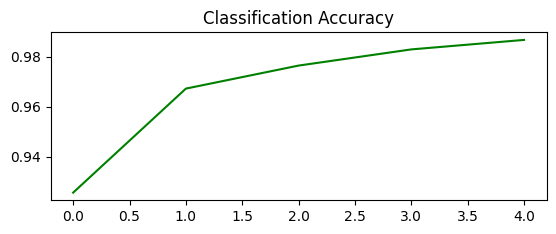

In [6]:
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.show()

In [9]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [10]:
# Compilar modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar modelo
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8889 - loss: 0.3575
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9842 - loss: 0.0511
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9894 - loss: 0.0331
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9922 - loss: 0.0250
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9940 - loss: 0.0184


In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9852 - loss: 0.0571
Test accuracy: 0.987500011920929


In [14]:
# Guardar el modelo
model.save('modelo_digitos_mao02.keras')
